In [25]:
import pandas as pd


In [26]:
import matplotlib.pyplot as plt

In [27]:
import numpy as np

In [9]:
corona=pd.read_excel("corona.xlsx")
print(corona.columns)

Index(['Patient Number', 'State Patient Number', 'Date Announced',
       'Age Bracket', 'Gender', 'Detected City', 'Detected District',
       'Detected State', 'Current Status', 'Notes',
       'Contracted from which Patient (Suspected)', 'Nationality',
       'Type of transmission', 'Status Change Date', 'Source_1', 'Source_2',
       'Source_3', 'Backup Notes'],
      dtype='object')


In [10]:
corona.head()

,Patient Number,State Patient Number,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Notes,Contracted from which Patient (Suspected),Nationality,Type of transmission,Status Change Date,Source_1,Source_2,Source_3,Backup Notes
0,1,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,Recovered,Travelled from Wuhan,NaN,India,Imported,14/02/2020,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan
1,2,KL-AL-P1,2020-02-02 00:00:00,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,Travelled from Wuhan,NaN,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan
2,3,KL-KS-P1,2020-03-02 00:00:00,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,Travelled from Wuhan,NaN,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,Student from Wuhan
3,4,DL-P1,2020-02-03 00:00:00,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,"Travelled from Austria, Italy",NaN,India,Imported,15/03/2020,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,NaN,Travel history to Italy and Austria
4,5,TS-P1,2020-02-03 00:00:00,24,M,Hyderabad,Hyderabad,Telangana,Recovered,"Travelled from Dubai to Bangalore on 20th Feb,...",NaN,India,Imported,2020-02-03 00:00:00,https://www.deccanherald.com/national/south/qu...,https://www.indiatoday.in/india/story/coronavi...,https://www.thehindu.com/news/national/coronav...,"Travel history to Dubai, Singapore contact"


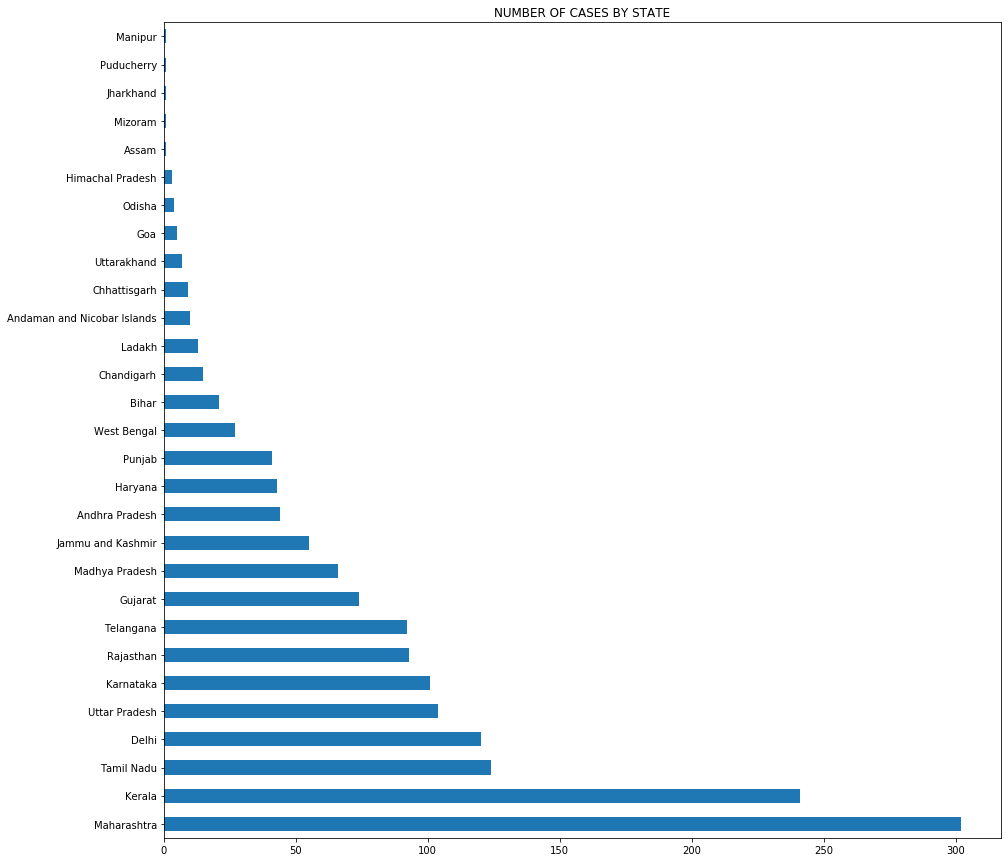

In [20]:
state=corona["Detected State"].value_counts()
state.plot.barh(figsize=(15,15),title="NUMBER OF CASES BY STATE")
plt.savefig("2_Cases By State.png",dpi=960)
plt.show()

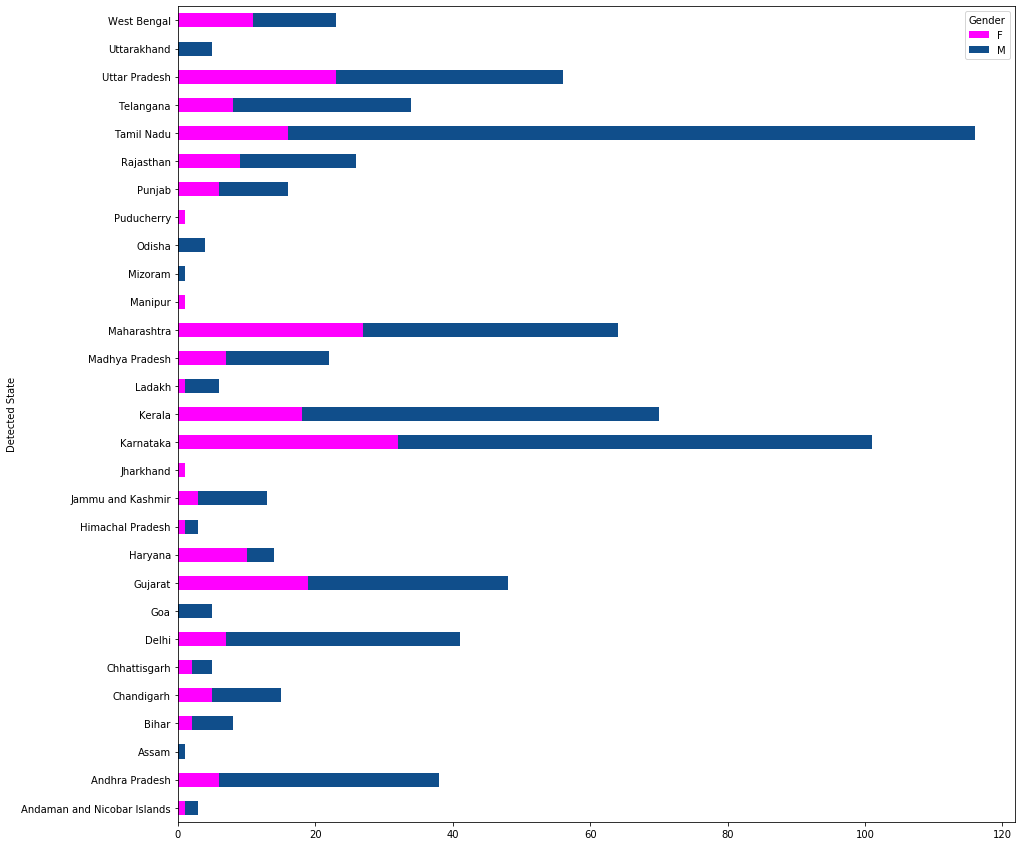

In [24]:
gender_by_state=corona.groupby(["Detected State","Gender"])["Gender"].count()
gender_by_state.unstack().plot.barh(figsize=[15,15],stacked=True,color=["#FF00FF","#104E8B"])
plt.savefig("3_cases by gender,state.png",dpi=960)
plt.show()

In [23]:
corona['Current Status'].plot(kind="hist")
plt.title("Current Status of recovery, hospitalized ansd diseased in all the world")
plt.ylabel("Nationality")
plt.xlabel("Countries")
plt.show()

TypeError: no numeric data to plot

In [18]:
corona["Age Bracket"] = corona["Age Bracket"].fillna("NIA")
crna=corona["Age Bracket"].value_counts()
print(crna)

NIA    1001
21       25
35       22
32       21
55       20
       ... 
9         1
89        1
6         1
77        1
72        1
Name: Age Bracket, Length: 79, dtype: int64


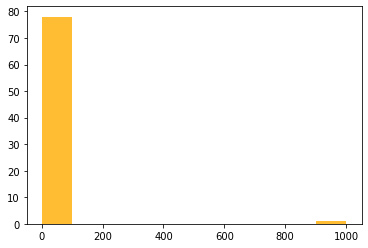

In [19]:
plt.hist(crna,color="#ffbd33")
plt.show()

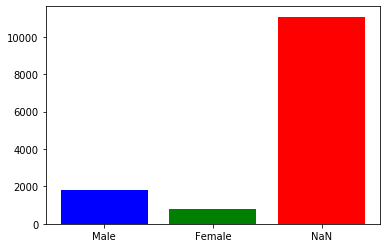

In [33]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
URL = "https://api.covid19india.org/raw_data.json" 
data = requests.get(url=URL).json()
sex=pd.DataFrame(data["raw_data"])
female=sex[sex["gender"]=="F"]
male=sex[sex["gender"]=="M"]
no_total=sex['patientnumber'].count()
no_female=female['patientnumber'].count()
no_male=male['patientnumber'].count()
nan=no_total-no_female-no_male
y=[no_male,no_female,nan]
x=['Male','Female','NaN']
plt.bar(x,y,color=["blue","green","red"])
plt.show()

enter the name of stateDelhi
enter the name of statePunjab


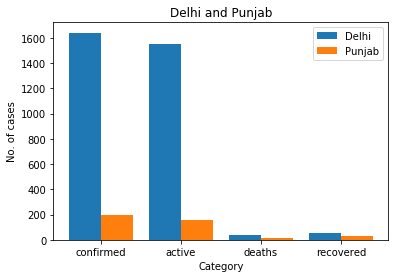

In [34]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
URL = "https://api.covid19india.org/data.json" 
data = requests.get(url=URL).json()
covid19_df = json_normalize(data['statewise'])
def barplt(st1,st2):
    c1=int(covid19_df[covid19_df.state==st1]['confirmed'])
    a1=int(covid19_df[covid19_df.state==st1]['active'])
    d1=int(covid19_df[covid19_df.state==st1]['deaths'])
    r1=int(covid19_df[covid19_df.state==st1]['recovered'])
    c2=int(covid19_df[covid19_df.state==st2]['confirmed'])
    a2=int(covid19_df[covid19_df.state==st2]['active'])
    d2=int(covid19_df[covid19_df.state==st2]['deaths'])
    r2=int(covid19_df[covid19_df.state==st2]['recovered'])
    x1=[c1,a1,d1,r1]
    x2=[c2,a2,d2,r2]
    y=['confirmed','active','deaths','recovered']
    xpos=np.arange(len(y))
    plt.bar(xpos-0.2,x1,width=0.4,label=st1)
    plt.bar(xpos+0.2,x2,width=0.4,label=st2)
    plt.xlabel("Category")
    plt.ylabel("No. of cases")
    plt.title(st1+" and "+st2)
    plt.xticks(xpos,y)
    plt.legend()
    plt.show()
stn1=input("enter the name of state")
stn2=input("enter the name of state")
barplt(stn1.capitalize(),stn2.capitalize()) #call the function to draw the barplot between two states 